In [2]:
import numpy as np
#!pip install scikit-image
from skimage import io
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import nltk
from nltk.util import ngrams
from spacy.lang.en import English
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
nlp = English()

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers

Using TensorFlow backend.


In [3]:
!pip install -q xlrd
!git clone https://github.com/ana-bca/Proyecto-Mineria-de-Datos

Cloning into 'Proyecto-Mineria-de-Datos'...
remote: Enumerating objects: 73765, done.
remote: Total 73765 (delta 0), reused 0 (delta 0), pack-reused 73765
Receiving objects: 100% (73765/73765), 2.14 GiB | 38.10 MiB/s, done.
Resolving deltas: 100% (966/966), done.
Checking out files: 100% (10036/10036), done.


In [3]:
# Lectura de tablas ==========================================================#
#data_F = pd.read_csv('Proyecto-Mineria-de-Datos/data_F.csv', engine='python',sep=",")
data_train = pd.read_csv('Proyecto-Mineria-de-Datos/Imagenes/data_train.csv', engine='python',sep="\t")
data_test = pd.read_csv('Proyecto-Mineria-de-Datos/Imagenes/data_test.csv', engine='python',sep="\t")
data_valid = pd.read_csv('Proyecto-Mineria-de-Datos/Imagenes/data_valid.csv', engine='python',sep="\t")

Ngrams_1 = pd.read_csv('Proyecto-Mineria-de-Datos/palabras_finales.csv', engine='python',sep="\t")
Ngrams_2 = pd.read_csv('Proyecto-Mineria-de-Datos/prueba1.csv',sep=",")
# Funciones ==================================================================#
N2 = Ngrams_2.compuesta.values
def TUPT(x):
    x_N1 = np.array(NGRAM(x,1))
    x_N1 = x_N1.reshape(x_N1.shape[0],)
    #x_N2 = pd.DataFrame(np.array(NGRAM(data_F.caption[0],2)))
    #x_N2 = x_N2.agg(' '.join, axis=1).values
    #x_N2 = np.array([x for x in x_N2 if x in N2])
    #x_T = list(np.append(x_N1.astype(str), x_N2.astype(str)))
    x_T = list(set(x_N1.astype(str)))
    return x_T
def NGRAM(x,n):
    token=nltk.word_tokenize(str(x))
    bigrams=ngrams(token,n)
    return list(bigrams)

In [4]:
data_train.head(5)

,photo_id,caption
0,S0PoIUWo8sU5t3G0jbE3qg.jpg,cream
1,gEAdbPN2uZ0agg1ndDDUhA.jpg,cheese burger tomato roll
2,M3L1IfeW7SEJ_33Dj8LdQg.jpg,chili tomato
3,qqhyXHguzecSXKX66WPw0g.jpg,cream
4,nUxXcUk-vUI0-KV28vGB9g.jpg,salad


In [5]:
# Generamos las clases en los dataframe
import nltk
nltk.download('punkt')
data_train = data_train.assign(tags = np.array(data_train.caption.map(lambda p: TUPT(p))))
data_test = data_test.assign(tags = np.array(data_test.caption.map(lambda p: TUPT(p))))
data_valid = data_valid.assign(tags = np.array(data_valid.caption.map(lambda p: TUPT(p))))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
data_train.head()

,photo_id,caption,tags
0,S0PoIUWo8sU5t3G0jbE3qg.jpg,cream,[cream]
1,gEAdbPN2uZ0agg1ndDDUhA.jpg,cheese burger tomato roll,"[tomato, roll, burger, cheese]"
2,M3L1IfeW7SEJ_33Dj8LdQg.jpg,chili tomato,"[tomato, chili]"
3,qqhyXHguzecSXKX66WPw0g.jpg,cream,[cream]
4,nUxXcUk-vUI0-KV28vGB9g.jpg,salad,[salad]


In [7]:
# Cree un ImageDataGenerator con flow_from_dataframe
## Clases en los datos
Ngrams_1 = Ngrams_1.word.values
Ngrams_2 = Ngrams_2.compuesta[Ngrams_2.Clase == 1].values
#keys =   np.append(Ngrams_1, Ngrams_2) # Estas son las clases definitivas
keys = list(set(Ngrams_1.astype(str)))
len(keys)

120

In [9]:
#datagen_train = ImageDataGenerator(
#    rescale = 1./255,
#    zoom_range=0.2,
#    shear_range=0.2,
#    rotation_range = 5,
#    horizontal_flip=True)
datagen_train = ImageDataGenerator(rescale = 1./255)
datagen = ImageDataGenerator(rescale = 1./255)
train_generator = datagen_train.flow_from_dataframe(
    dataframe = data_train[["photo_id","tags"]],
    directory = "Proyecto-Mineria-de-Datos/Imagenes/train",
    x_col = "photo_id",
    y_col = "tags",
    batch_size = 32,
    class_mode = "categorical",
    shuffle=True,
    color_mode = "rgb",
    classes = keys,
    target_size = (400,500))

valid_generator = datagen.flow_from_dataframe(
    dataframe = data_valid[["photo_id","tags"]],
    directory = "Proyecto-Mineria-de-Datos/Imagenes/valid",
    x_col = "photo_id",
    y_col = "tags",
    batch_size = 32,
    class_mode = "categorical",
    shuffle=True,
    color_mode = "rgb",
    classes = keys,
    target_size = (400,500))

test_generator = datagen.flow_from_dataframe(
    dataframe = data_test[["photo_id","tags"]],
    directory = "Proyecto-Mineria-de-Datos/Imagenes/test",
    x_col = "photo_id",
    y_col = "tags",
    batch_size = 32,
    class_mode = None,
    shuffle=True,
    color_mode = "rgb",
    target_size = (400,500))

Found 5927 validated image filenames belonging to 120 classes.
Found 1969 validated image filenames belonging to 120 classes.
Found 2000 validated image filenames.


In [15]:
# Construye el modelo:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K

EPOCHS = 5
INIT_LR = 1e-3
BS = 32
IMAGE_DIMS = (400,500,3)

model = Sequential()
inputShape = (400,500,3)
chanDim = -1
if K.image_data_format() == "channels_first":
			inputShape = (depth, height, width)
			chanDim = 1
# CONV => RELU => POOL
model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
# (CONV => RELU) * 2 => POOL
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# (CONV => RELU) * 2 => POOL
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
### (CONV => RELU) * 2 => POOL
model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
### (CONV => RELU) * 2 => POOL
model.add(Conv2D(512, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(512, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))   
### (CONV => RELU) * 2 => POOL
model.add(Conv2D(512, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(512, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# first (and only) set of FC => RELU layers
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(BatchNormalization(axis=chanDim))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(BatchNormalization(axis=chanDim))
model.add(Dropout(0.5))
model.add(Dense(1000, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(len(keys)))
model.add(Activation('sigmoid'))
# initialize the optimizer (SGD is sufficient)
from keras.optimizers import Adam
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=5
)

Epoch 1/5
  9/185 [>.............................] - ETA: 1:14:08 - loss: 0.7052 - accuracy: 0.5471

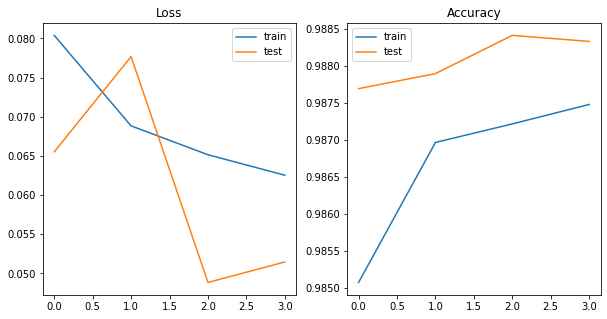

In [ ]:
# Graficas de validaciones ====================================================#
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']= 10,5
fig, axs = plt.subplots(1, 2)
axs[0].plot(history.history['loss'][1:], label='train')
axs[0].plot(history.history['val_loss'][1:], label='test')
axs[0].set_title('Loss')
axs[0].legend()
axs[1].plot(history.history['accuracy'][1:], label='train')
axs[1].plot(history.history['val_accuracy'][1:], label='test')
axs[1].set_title('Accuracy')
axs[1].legend()

In [ ]:
pred = model.predict_generator(test_generator, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=1)  
predicted = np.argmax(pred, axis=1)

32/32 [==============================] - 185s 6s/step


0.14237073
0.14945269
0.07346243
0.11189711
0.07991493


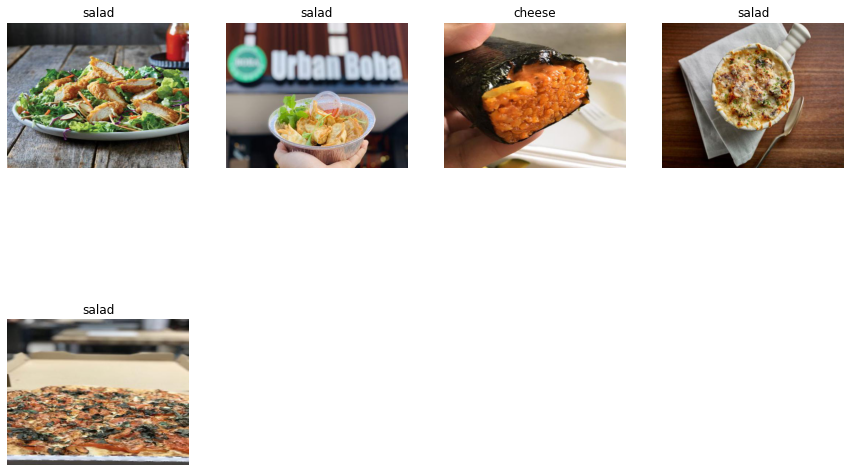

In [ ]:
import os
import keras
test_dir = 'Proyecto-Mineria-de-Datos/Imagenes/test'
classes = train_generator.class_indices
decode_classes = {v: k for k, v in classes.items()}
decode_classes
filenames_full = []
for dirpath, dirnames, filenames in os.walk(test_dir):
    for filename in filenames:
        filenames_full.append(os.path.join(dirpath, filename))
filenames_full = filenames_full[250:255]
rows = (len(filenames_full) - 1) // 4 + 1
plt.figure(figsize=(15, 5 * rows))
for index, filename_full in enumerate(filenames_full):
    plt.subplot(rows, 4, index + 1)
    test_image = keras.preprocessing.image.load_img(filename_full, target_size=(400,500))
    test_input = keras.preprocessing.image.img_to_array(test_image) * (1. / 255)
    test_input = np.expand_dims(test_input, axis=0)
    plt.imshow(test_image)
    plt.axis('off')
    prediction = model.predict(test_input)
    prediction = prediction.reshape(len(keys),)
    print(prediction[np.argmax(prediction)])
    type_name = decode_classes[np.argmax(prediction)]
    plt.title(type_name)


In [ ]:
def predict_one(model):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0]):
      image = image_batch[k]
      pred = predicted_batch[k]
      the_pred = np.argmax(pred)
      predicted = class_names[the_pred]
      val_pred = max(pred)
      the_class = np.argmax(classes_batch[k])
      value = class_names[np.argmax(classes_batch[k])]
      plt.figure(k)
      isTrue = (the_pred == the_class)
      plt.title(str(isTrue) + ' - class: ' + value + ' - ' + 'predicted: ' + predicted + '[' + str(val_pred) + ']')
      plt.imshow(image)

predict_one(model)

ValueError: ignored